In [1]:
import pandas as pd
import numpy as np

In [5]:
DATA_FOLDER = 'data/'
QUOTEBANK_2020 = DATA_FOLDER+ "quotes-2020.json.bz2"
QUOTEBANK_2019 = DATA_FOLDER+ "quotes-2019.json.bz2"
QUOTEBANK_2017 = DATA_FOLDER+ "quotes-2017.json.bz2"
QUOTEBANK_2015 = DATA_FOLDER+ "quotes-2015.json.bz2"
QUOTEBANK_2018 = DATA_FOLDER+ "quotes-2018.json.bz2"
QUOTEBANK_2016 = DATA_FOLDER+ "quotes-2016.json.bz2"

GENEREATED_DATA = 'generated_data/'

PARQUET_FILE = GENEREATED_DATA +  "speaker_attributes.parquet"

In [6]:
dataframesNames = ('QOI_2015_DF','QOI_2016_DF','QOI_2017_DF','QOI_2018_DF','QOI_2019_DF','QOI_2020_DF')

In [7]:
# Concatenate into one dataframes the dataframes from each pickle file. 
df = pd.concat([pd.read_pickle(GENEREATED_DATA+ fp +'.pkl') for fp in dataframesNames], ignore_index=True)

In [8]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,[Q463507],2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,E
1,2015-04-24-025718,I'd like to congratulate all the winners and f...,Helena Morrissey,[Q23762081],2015-04-24 15:33:00,1,"[[Helena Morrissey, 0.8706], [None, 0.1294]]",[http://www.cipd.co.uk/PM/peoplemanagement/b/w...,E
2,2015-07-16-044620,I think what Deepika has spoken in the video m...,Kalki Koechlin,[Q3192216],2015-07-16 16:41:07,1,"[[Kalki Koechlin, 0.6377], [None, 0.3623]]",[http://www.pinkvilla.com/entertainmenttags/ka...,E
3,2015-09-11-052815,if advocating for equal pay for equal work is ...,Hillary Clinton,[Q6294],2015-09-11 14:17:08,1,"[[Hillary Clinton, 0.8831], [None, 0.1105], [D...",[http://www.wrn.com/2015/09/hillary-clinton-ra...,E
4,2015-04-23-037713,Men and women are understandably upset if they...,Jim McDermott,"[Q321457, Q6196778]",2015-04-23 21:52:22,1,"[[Jim McDermott, 0.629], [John F. Kerry, 0.190...",[http://www.atlanticcouncil.org/en/blogs/new-a...,E


In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Younes\AppData\Roaming\nltk_data...


In [18]:
import seaborn as sns

In [20]:
def visualise_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [21]:
sentence = df['quotation'].loc[1]

In [22]:
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.946}

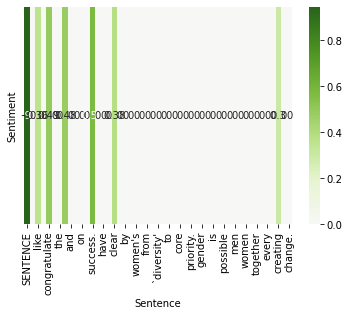

In [23]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})